In [1]:
# IMPORT PACKAGES, DATA, AND FUNCTIONS FROM SEPARATE FILE
from package_bfry import *

/Users/brianfry/Documents/GitHub/Bologna/package_bfry/bfry.py:312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_2019['Area Statistica'] = income_2019['Area Statistica'].str.upper()


In [ ]:
# PART 1: DESCRIPTIVE EXPLORATION #
# create maps that explore the geographic variation of the metrics produced 

In [ ]:
# HOUSEHOLD SIZE
# map the household size
base_map_2019.explore(column = 'avg_household_size', cmap = 'RdBu_r', tooltip = ('zona_fiu', 'population', 'households', 'avg_household_size'), 
                                          tiles = 'CartoDB positron', legend=True)

In [ ]:
# explore gyms per 1000
amenities_2019.explore(column = 'gyms_per_1000', cmap = 'RdBu', tooltip = ('zona_fiu', 'population', 'gyms_per_1000'), 
                                          tiles = 'CartoDB positron', legend=True)

In [ ]:
# airbnb #
# base dataset : airbnb_agg

create_map(base_map_2019, airbnb_agg, 'household', 'airbnb', airbnb)

In [ ]:
# WIFI #
# base dataset : wifi_agg

# map the wifi per capita
create_map(base_map_2019, wifi_agg, 'population', 'hotspot', wifi, quotient = 1000)

In [ ]:
# PARTICIPATORY BUDGET #
# base dataset : budg_geo

    # process data for mapping
# aggregate the count of participative budget projects at the neighborhood level
# TO DO - resolve mixed geometry situation
#budg_agg = 
#gpd.overlay(base_map_2019, budg_geo, how='intersection', keep_geom_type=False) #.groupby('cod_zona').count()
#budg_agg
# rename and subset the data just to the count of the projects per neighborhood
#budg_agg = budg_agg.rename(columns={'Progetto':'project_count'})['project_count']
budg_geo.explore()
    # map the data
#create_map(base_map_2019, budg_agg, 'population', 'project', budg_geo, quotient = 1000)

In [ ]:
# explore traffic per capita at the zone level
transport_2019.explore(column = 'traffic_per_1000', cmap = 'RdBu_r')

In [ ]:
# explore bike parking per capita / household
transport_2019.explore(column = 'bike_parking_per_household', cmap = 'RdBu_r')

In [ ]:
# explore bus stops per capita
transport_2019.explore(column = 'tper_stops_per_1000', cmap = 'RdBu_r')

In [ ]:
# calculate the number of traffic coils per zone to determine the adequacy of this measurement 
base_map_2019.join(traffic_2019_geo.sjoin(base_map_2019[['geometry']]).groupby('index_right')['day_total_traffic'].count()).explore(column = 'day_total_traffic', tooltip= ('day_total_traffic'), cmap = 'RdBu_r')

In [ ]:
# PART 2: MULTI VARIABLE ANALYSIS #
    # explore and select metrics to use in categorization of Bologna's zones
    # create a dataframe of variables to be analyzed together
        # can add or remove metrics for analysis as needed
        # standardize the data by using z-scores - allows for simple comparison / analysis of above, at, or below average across the city's zones
    # run k-means cluster analysis on the standardized datasets
    # use principal components analysis (PCA) to complement the k-means clustering method - creating linear systems that explain as much variance as possible
    # brief exploration of hierarcical clustering algorithm

In [2]:
# calculate the z-score to give a more standard frame of rereference across metrics
df_z = (all_metrics - all_metrics.mean())/all_metrics.std()

# reorder columns for visualization purposes
cols = ['00-14', '15-29', '30-44', '45-64', '65 e oltre',
        'population', 'pop_density_km2', 'avg_income', 'workers_per_cap', 'students_per_cap',
        'traffic_per_1000', 'incident_per_traffic', 'injured_per_incident', 'mortality_per_incident', 
        'bike_parking_per_1000', 'bike_m_per_capita', 'percent_protected_bike', 'tper_stops_per_1000',
        'arredo_per_1000', 'p_arredo_good', 'gyms_per_1000', 'school_per_1000_child', 'wifi_per_1000', 'airbnb_per_household']
df_z = df_z[cols]

    # create a subset of just base/socioecon related metrics
df_z_socioecon = df_z[['population', '00-14', '15-29', '30-44', '45-64', '65 e oltre',
       'avg_income', 'workers_per_cap', 'students_per_cap', 'pop_density_km2']]

    # create a subset of just transport related metrics
df_z_transport = df_z[['injured_per_incident', 'mortality_per_incident',
       'incident_per_traffic', 'bike_parking_per_1000', 'bike_m_per_capita',
       'percent_protected_bike', 'tper_stops_per_1000']]

    # create a subset of just amenities related metrics
df_z_amenities = df_z[['p_arredo_good',
       'school_per_1000_child', 'arredo_per_1000', 'wifi_per_1000',
       'airbnb_per_household', 'gyms_per_1000']]

In [ ]:
# plot the distribution for each variable to explore variation
for column in df_z:
    df_z[[column]].plot.hist()

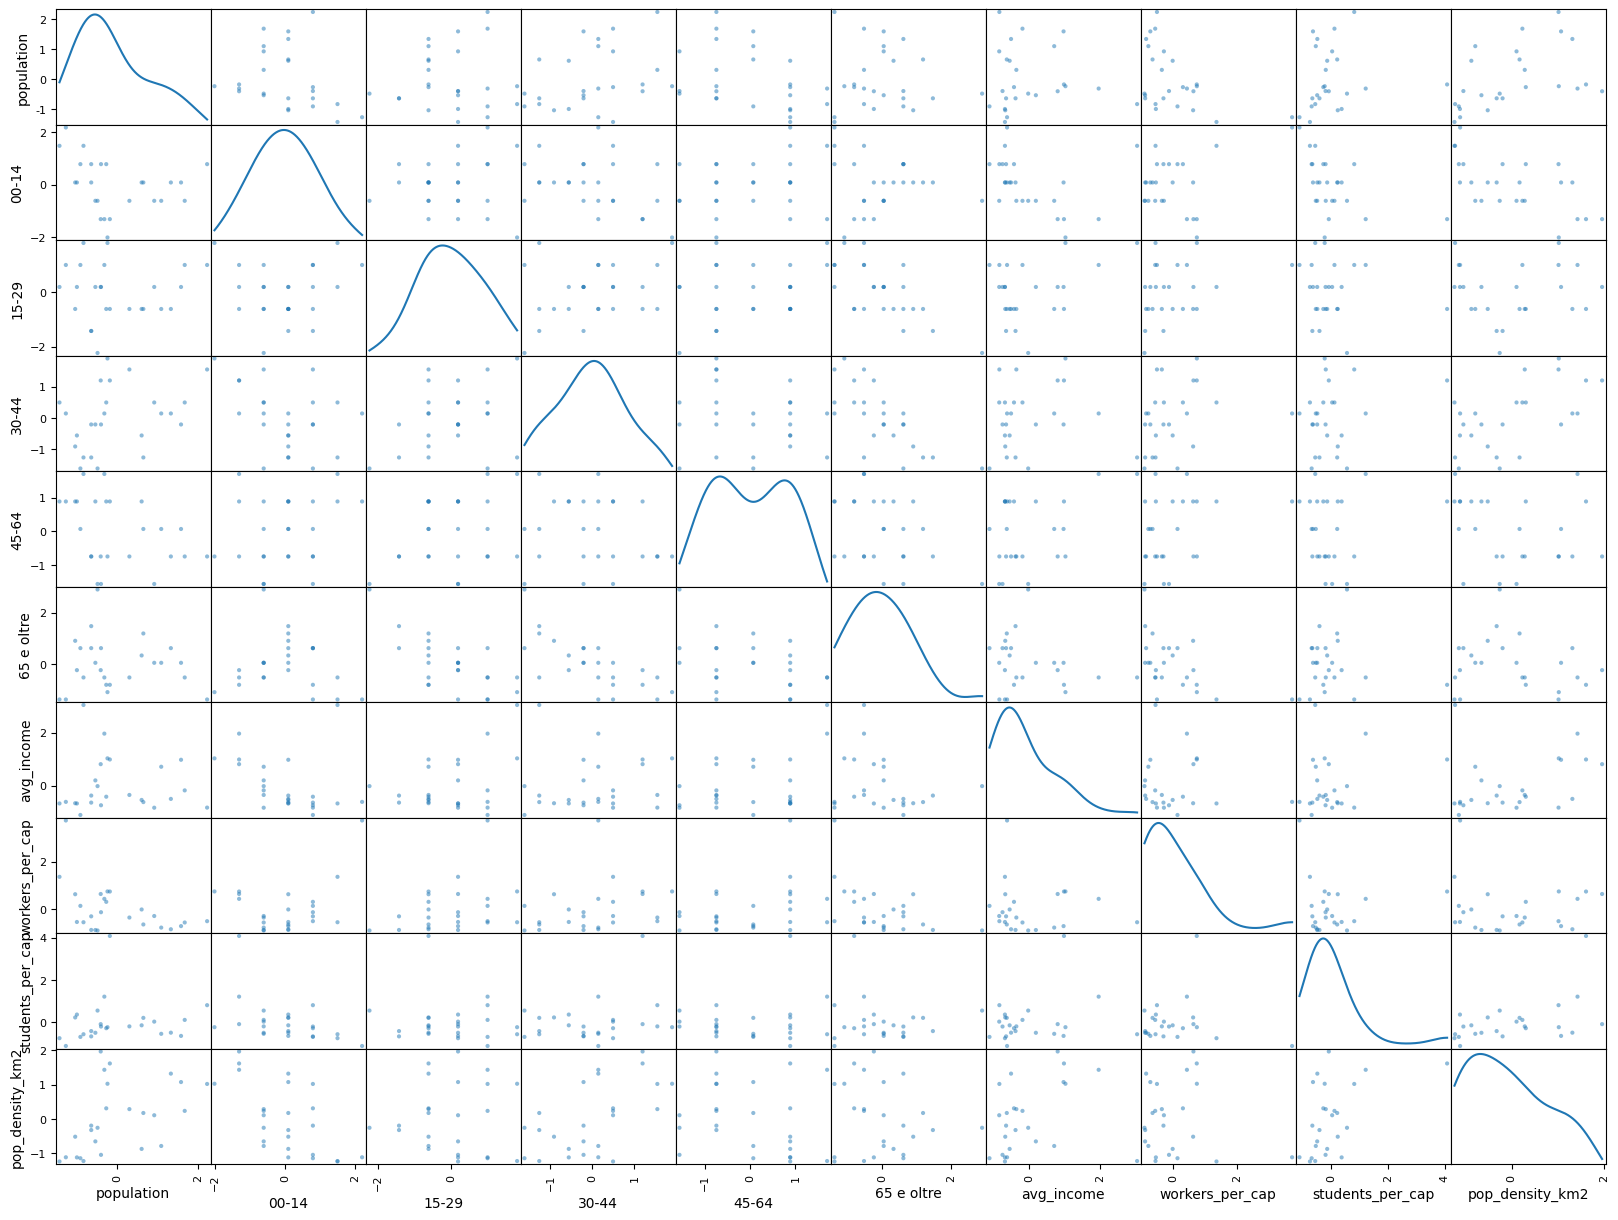

In [9]:
# scattter matrix to view distributions and correlations together
pd.plotting.scatter_matrix(df_z_socioecon, diagonal="kde",figsize=(20,15))
plt.show()

In [8]:
# display the numeric values of the correlation coefficients between every pair of variables
df_z.corr()

,00-14,15-29,30-44,45-64,65 e oltre,population,pop_density_km2,avg_income,workers_per_cap,students_per_cap,...,bike_parking_per_1000,bike_m_per_capita,percent_protected_bike,tper_stops_per_1000,arredo_per_1000,p_arredo_good,gyms_per_1000,school_per_1000_child,wifi_per_1000,airbnb_per_household
00-14,1.000000,0.077781,-0.372658,0.233759,-0.112848,-0.256509,-0.624981,-0.321175,0.298169,-0.473959,...,-0.687283,0.594431,0.049393,0.560930,0.392391,0.286367,-0.056460,-0.590627,-0.549418,-0.641002
15-29,0.077781,1.000000,0.303974,0.290622,-0.685188,0.024864,0.010792,0.366274,0.323406,-0.121988,...,0.298253,0.048855,-0.159534,0.404760,-0.210039,-0.012117,-0.675955,-0.235485,0.243095,0.428852
30-44,-0.372658,0.303974,1.000000,-0.165499,-0.723502,0.323711,0.577280,0.084246,0.270976,0.250271,...,0.587165,-0.167802,-0.346757,-0.373249,-0.640358,-0.269075,-0.402323,0.140784,0.365551,0.616663
45-64,0.233759,0.290622,-0.165499,1.000000,-0.393220,-0.377612,-0.208627,0.403591,0.333168,0.122124,...,0.002943,0.177273,-0.177293,0.508895,-0.015306,0.444425,-0.332722,0.023811,0.253227,0.091115
65 e oltre,-0.112848,-0.685188,-0.723502,-0.393220,1.000000,-0.057557,-0.161265,-0.207416,-0.517297,-0.069352,...,-0.335329,-0.155100,0.388584,-0.200213,0.445289,-0.038074,0.661189,0.119032,-0.267920,-0.449592
population,-0.256509,0.024864,0.323711,-0.377612,-0.057557,1.000000,0.468902,-0.039010,-0.477619,0.106167,...,-0.003502,-0.503166,0.062893,-0.574377,-0.280629,-0.112187,-0.235911,0.099301,-0.033307,-0.031663
pop_density_km2,-0.624981,0.010792,0.577280,-0.208627,-0.161265,0.468902,1.000000,0.295014,-0.082974,0.486546,...,0.722608,-0.549968,-0.120771,-0.611411,-0.516908,-0.218965,-0.082053,0.421728,0.576151,0.637368
avg_income,-0.321175,0.366274,0.084246,0.403591,-0.207416,-0.039010,0.295014,1.000000,-0.059105,0.217042,...,0.500577,-0.529146,-0.141382,0.221702,-0.556250,-0.091307,-0.380690,0.308430,0.548903,0.572084
workers_per_cap,0.298169,0.323406,0.270976,0.333168,-0.517297,-0.477619,-0.082974,-0.059105,1.000000,-0.021605,...,0.254247,0.652587,-0.587460,0.402745,-0.046539,0.255624,-0.109758,-0.129858,0.183842,0.284471
students_per_cap,-0.473959,-0.121988,0.250271,0.122124,-0.069352,0.106167,0.486546,0.217042,-0.021605,1.000000,...,0.514264,-0.317605,-0.057900,-0.313738,-0.317959,0.120477,0.175401,0.857153,0.758215,0.485009


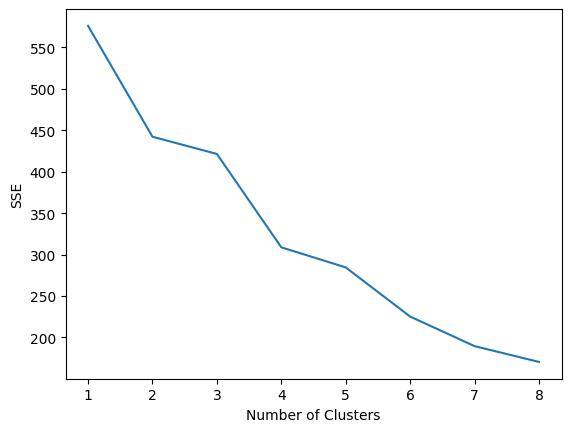

In [15]:
# visual test for best number of clusters
    # should use n-1 where n is the "elbow" of the plot where slope significantly changes
%matplotlib inline

# set an array fot eh different number of clusters to test
numClusters = [1,2,3,4,5,6,7,8]
# initialize the sum of sqaures error array to be empty
SSE = []

# iterate through the k-means cluster analysis instances with each different possible number of clusters and store the sum of squares error
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(df_z)
    SSE.append(k_means.inertia_)

# display a screeplot of the clusters
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [12]:
# create a 4-cluster model using all metrics
# this model will be the current subject of further research and visualization
df_z_clusters_4 = km_cluster_analysis(df_z, 4, base_map_2019)

# rename the clusters to have more meaningful titles
df_z_clusters_4.geo['Cluster'] = df_z_clusters_4.geo['Cluster'].str.replace('0', 'Eastern Outliers')
df_z_clusters_4.geo['Cluster'] = df_z_clusters_4.geo['Cluster'].str.replace('1', 'Outer Ring')
df_z_clusters_4.geo['Cluster'] = df_z_clusters_4.geo['Cluster'].str.replace('2', 'Inner Ring')
df_z_clusters_4.geo['Cluster'] = df_z_clusters_4.geo['Cluster'].str.replace('3', 'Center')

# rename the centroid clusters as well for the visualization-producing function
# create a new column in he centroids data table that holds the given titles
df_z_clusters_4.centroids['index'] = df_z_clusters_4.centroids.reset_index()['index'].replace(0, 'Eastern Outliers')
df_z_clusters_4.centroids['index'] = df_z_clusters_4.centroids.reset_index()['index'].replace(1, 'Outer Ring')
df_z_clusters_4.centroids['index'] = df_z_clusters_4.centroids.reset_index()['index'].replace(2, 'Inner Ring')
df_z_clusters_4.centroids['index'] = df_z_clusters_4.centroids.reset_index()['index'].replace(3, 'Center')

# set this new column as the table's index - this will help create the visualizations correctly
df_z_clusters_4.centroids = df_z_clusters_4.centroids.set_index('index')

# output the map
df_z_clusters_4.geo.explore(column = 'Cluster', cmap = ['red','blue','green','orange'], tiles= "CartoDB positron", tooltip = ('zona_fiu','Cluster'))

In [ ]:
# display the average z-score for each metric across each cluster (the centroids of each cluster)
# this tells us about the character of each cluster
# for interpretation: a more negative/positive number means a cluster is characterized by being more below/above the average across all zones
df_z_clusters_4.centroids

In [ ]:
# display charcteristic line charts for all metrics, first showing the cluster centroids then the variation within clusters
for id in ['x','Eastern Outliers','Outer Ring','Inner Ring','Center']:
    for metrics_list in [['00-14', '15-29', '30-44', '45-64', '65 e oltre'],
                        ['population', 'pop_density_km2', 'avg_income', 'workers_per_cap', 'students_per_cap'],
                        ['traffic_per_1000', 'incident_per_traffic', 'injured_per_incident', 'mortality_per_incident'], 
                        ['bike_parking_per_1000', 'bike_m_per_capita', 'percent_protected_bike', 'tper_stops_per_1000'],
                        ['arredo_per_1000', 'p_arredo_good', 'gyms_per_1000', 'school_per_1000_child', 'wifi_per_1000', 'airbnb_per_household']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_z_clusters_4, 
                analysis_data = df_z,
                cluster_id = id, 
                metrics = metrics_list)

In [ ]:
# calculate the average distance between the cluster members and the centroid
# this measure is an indicator of the strength of the relationship in the clusters
for id in ['Eastern Outliers','Outer Ring','Inner Ring','Center']:
    df_iter = df_z.join(df_z_clusters_4.geo['Cluster']).loc[df_z_clusters_4.geo['Cluster'] == id].drop(columns=['Cluster'])
    centroid = df_z_clusters_4.centroids.loc[df_z_clusters_4.centroids.index == id].to_numpy()[0]
    sum = 0
    for row in range(len(df_iter)):
        sum += dist(df_iter.iloc[row].to_numpy(),centroid)
    print(id + ' avg distance from centroid: ' + str(round(sum/len(df_iter),3)))

In [ ]:
# display the distance of each zone from its cluster's centroid
# this indicates how far away the zone is from the 'typical' zone of the cluster and will more easily show outliers
for id in ['Eastern Outliers','Outer Ring','Inner Ring','Center']:
    df_iter = df_z.join(df_z_clusters_4.geo['Cluster']).loc[df_z_clusters_4.geo['Cluster'] == id].drop(columns=['Cluster'])
    centroid = df_z_clusters_4.centroids.loc[df_z_clusters_4.centroids.index == id].to_numpy()[0]
    data = []
    for row in range(len(df_iter)):
        data.append([df_iter.index[row], dist(df_iter.iloc[row].to_numpy(),centroid)])
        #print(df_iter.index[row] + ' distance from centroid: ' + str(dist(df_iter.iloc[row].to_numpy(),centroid)))
    data.sort(key=lambda i: i[1], reverse = True)
    pprint(data)
    print('\n')

In [ ]:
# output charts focusing on croce del biacco - roveri as an outlier in the outer ring cluster
for metrics_list in [['00-14', '15-29', '30-44', '45-64', '65 e oltre'],
                        ['population', 'pop_density_km2', 'avg_income', 'workers_per_cap', 'students_per_cap'],
                        ['traffic_per_1000', 'incident_per_traffic', 'injured_per_incident', 'mortality_per_incident'], 
                        ['bike_parking_per_1000', 'bike_m_per_capita', 'percent_protected_bike', 'tper_stops_per_1000'],
                        ['arredo_per_1000', 'p_arredo_good', 'gyms_per_1000', 'school_per_1000_child', 'wifi_per_1000', 'airbnb_per_household']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_z_clusters_4, 
                analysis_data = df_z.loc[df_z.index == 'CROCE DEL BIACCO - ROVERI'],
                cluster_id = 'Outer Ring', 
                metrics = metrics_list,
                colors = 'rainbow')

In [5]:
# create a map highlighting CROCE DEL BIACCO - ROVERI for visualization of outliers in the final presentation
create_zone_highlight_map(cluster_model = df_z_clusters_4, zone = 'CROCE DEL BIACCO - ROVERI', cluster_color = 'orange', highlight_color = 'blue')

In [ ]:
# output charts focusing on saragozza- san luca as an outlier in the inner cluster
for metrics_list in [['00-14', '15-29', '30-44', '45-64', '65 e oltre'],
                        ['population', 'pop_density_km2', 'avg_income', 'workers_per_cap', 'students_per_cap'],
                        ['traffic_per_1000', 'incident_per_traffic', 'injured_per_incident', 'mortality_per_incident'], 
                        ['bike_parking_per_1000', 'bike_m_per_capita', 'percent_protected_bike', 'tper_stops_per_1000'],
                        ['arredo_per_1000', 'p_arredo_good', 'gyms_per_1000', 'school_per_1000_child', 'wifi_per_1000', 'airbnb_per_household']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_z_clusters_4, 
                analysis_data = df_z.loc[df_z.index == 'SARAGOZZA - SAN LUCA'],
                cluster_id = 'Inner Ring', 
                metrics = metrics_list,
                colors = 'rainbow')

In [6]:
# create a map highlighting SARAGOZZA - SAN LUCA for visualization of outliers in the final presentation
create_zone_highlight_map(cluster_model = df_z_clusters_4, zone = 'SARAGOZZA - SAN LUCA', cluster_color = 'green', highlight_color = 'blue')

In [ ]:
# output charts focusing on malpighi as an outlier in the center cluster
for metrics_list in [['00-14', '15-29', '30-44', '45-64', '65 e oltre'],
                        ['population', 'pop_density_km2', 'avg_income', 'workers_per_cap', 'students_per_cap'],
                        ['traffic_per_1000', 'incident_per_traffic', 'injured_per_incident', 'mortality_per_incident'], 
                        ['bike_parking_per_1000', 'bike_m_per_capita', 'percent_protected_bike', 'tper_stops_per_1000'],
                        ['arredo_per_1000', 'p_arredo_good', 'gyms_per_1000', 'school_per_1000_child', 'wifi_per_1000', 'airbnb_per_household']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_z_clusters_4, 
                analysis_data = df_z.loc[df_z.index == 'MALPIGHI'],
                cluster_id = 'Center', 
                metrics = metrics_list,
                colors = 'rainbow')

In [7]:
# create a map highlighting MALPIGHI for visualization of outliers in the final presentation
create_zone_highlight_map(cluster_model = df_z_clusters_4, zone = 'MALPIGHI', cluster_color = 'red', highlight_color = 'blue')

In [ ]:
#### The following cells explore creating clusters given only thematically similar metrics, such as transport, socioeconomics, etc. ####

In [ ]:
# perform 4-cluster analysis on df_z_socioecon (socioecon metrics only) and display results
df_socio_clusters_4 = km_cluster_analysis(df_z_socioecon, 4, base_map_2019)
df_socio_clusters_4.geo.explore(column = 'Cluster', cmap = ['blue','orange','green','red'], tiles= "CartoDB positron", tooltip = ('zona_fiu','Cluster'))

In [ ]:
# display the centroids for the 4-cluster analysis of just socioeconomic metrics
df_socio_clusters_4.centroids

In [ ]:
for id in ['x','0','1','2','3']:
    for metrics_list in [['00-14', '15-29', '30-44', '45-64', '65 e oltre'],
                        ['population', 'pop_density_km2', 'inv_avg_household_size', 'avg_income', 'workers_per_cap', 'students_per_cap']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_socio_clusters_4, 
                analysis_data = df_z_socioecon, 
                cluster_id = id, 
                metrics = metrics_list)

In [ ]:
# perform cluster analysis on df_z_transport (transport metrics only) and display results
# screeplot (the "elbow" graph) analysis of this dataset yielded a result that suggested 2 clusters was most meaningful 
df_transport_clusters_4 = km_cluster_analysis(df_z_transport, 4, base_map_2019)
df_transport_clusters_4.geo.explore(column = 'Cluster', cmap = ['blue','orange','green','red'], tiles= "CartoDB positron", tooltip = ('zona_fiu','Cluster'))
# should try to add more transportation related metrics and determine if this creates more meaningful insight

In [ ]:
# display the centroids for the 4-cluster analysis of just socioeconomic metrics
df_transport_clusters_4.centroids

In [ ]:
for id in ['x','0','1','2','3']:
    for metrics_list in [['traffic_per_1000', 'incident_per_1000', 'incident_per_traffic', 'injured_per_1000', 'injured_per_incident', 'mortality_per_1000'], 
                        ['bike_parking_per_1000', 'bike_m_per_capita', 'percent_protected_bike', 'tper_stops_per_1000']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_transport_clusters_4, 
                analysis_data = df_z_transport, 
                cluster_id = id, 
                metrics = metrics_list)

In [ ]:
# perform 4-cluster analysis on df_z_socioecon (socioecon metrics only) and display results
df_amenities_clusters_4 = km_cluster_analysis(df_z_amenities, 4, base_map_2019)
df_amenities_clusters_4.geo.explore(column = 'Cluster', cmap = ['blue','orange','green','red'], tiles= "CartoDB positron", tooltip = ('zona_fiu','Cluster'))

In [ ]:
for id in ['x','0','1','2','3']:
    for metrics_list in [['p_arredo_good', 'arredo_per_1000', 'school_per_1000_child', 'airbnb_per_household', 'gyms_per_1000', 'wifi_per_1000']]:
            # display the line charts
            cluster_line_chart(cluster_data = df_amenities_clusters_4, 
                analysis_data = df_z_amenities, 
                cluster_id = id, 
                metrics = metrics_list)

In [ ]:
# PRINCIPAL COMPONENTS ANALYSIS #

# creates a set of linear equations that, taken all together, explain the observed data
# the components are ordered by how much variance each individual equation explains
# these components can shed light on which metrics are most influential in explaining the data

In [ ]:
# set the resulting categories of the cluster analysis as dependent variable 
y = df_z_clusters_4.geo.reset_index()[['zona_fiu','Cluster']].sort_values(by = 'Cluster')

# process the dataset to allow cosnsistent labelling of clusters and sensable legend
# joins the Clusters to the analyzed dataframe, sorts by the Cluster given in the k-means cluster analysis, then removes the ID again for the PCA
df_z_pca = df_z.join(df_z_clusters_4.geo[['Cluster']]).reset_index().sort_values(by = 'Cluster').drop(columns=['Cluster']).set_index('zona_fiu')

# define the principal component analysis from the standardized z-score data
pca = PCA().fit(df_z_pca)

# set the colors of the palette to be passed to the visualization
palette = ['red','blue','green','orange']

# display a scatterplot of the data to show the clusters in comparison to the first two principal components
pca_scatter(pca, df_z_pca, y, palette)
# the PCA analysis and the cluster analysis appear compatible

In [ ]:
# run pca summary to see the amount of variance explained by each of the displayed PCs
pca_summary(pca, df_z)

In [ ]:
# display the coefficients associated with each metric in the principal components
# first principal component - round the coefficients to 3 decimal points
pca.components_[0].round(3)

In [ ]:
# repeat above for the second principal component
pca.components_[1].round(3)

In [ ]:
# display the columns to refernce against the coefficients in the last two cells
df_z.columns.to_array

In [ ]:
# HIERARCHICAL CLUSTERING #

# this method provides ability to see further granularity and the level of similarity / difference between the zones within and between clusters
# began exploring this method, but not used in final presentation
# could be further explored in future research

In [ ]:
# average linkage - compares using average euclidean distance between members of each cluster
# linkage and dendrogram methods are imported from scipy.cluster.hierarchy
linkage_matrix = linkage(df_z, method='average', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=8., show_contracted=True, labels=df_z.index)
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')
plt.xlabel('Zones')
plt.ylabel('Distance')
plt.show()